In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tqdm import tqdm
import regex as re

In [ ]:
df = pd.read_csv("/content/sample_data/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
df['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [ ]:
for item in dict(df['Floor'].value_counts()).items():
  if item[1] < 10:
    df = df[df['Floor']!=item[0]]
df['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
3 out of 4         239
Ground out of 3    209
1 out of 4         200
Ground out of 1    195
1 out of 1         134
2 out of 2         132
Ground out of 4    115
2 out of 5         106
3 out of 3          96
1 out of 5          87
4 out of 5          86
3 out of 5          84
4 out of 4          73
3 out of 7          32
5 out of 7          32
Ground out of 5     29
5 out of 5          28
4 out of 7          27
6 out of 7          24
2 out of 7          23
3 out of 6          21
2 out of 6          18
1 out of 7          18
1 out of 6          17
5 out of 8          16
4 out of 6          16
5 out of 6          16
4 out of 8          15
6 out of 10         15
2 out of 8          14
5 out of 14         13
7 out of 10         12
1 out of 8          11
6 out of 8          11
5 out of 12         10
10 out of 14        10
Name: Floor, dtype: int64

In [ ]:
df['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [ ]:
df['Area Locality'].value_counts()

Velachery                    22
Electronic City              22
Miyapur, NH 9                20
Madipakkam                   20
Bandra West                  20
                             ..
Jamia Nagar, Okhla            1
Suryodaya CHS, Prabhadevi     1
Mansa Ram Park                1
Palam - Dabri Marg            1
Manikonda, Hyderabad          1
Name: Area Locality, Length: 1805, dtype: int64

In [ ]:
for item in dict(df['Area Locality'].value_counts()).items():
  if item[1] < 10:
    df = df[df['Area Locality']!=item[0]]
df['Area Locality'].value_counts()

Velachery                                   22
Electronic City                             22
Miyapur, NH 9                               20
Madipakkam                                  20
Bandra West                                 20
K R Puram                                   19
Laxmi Nagar                                 19
Salt Lake City Sector 2                     16
Banjara Hills, NH 9                         16
Medavakkam                                  16
Ambattur                                    14
Murugeshpalya, Airport Road                 14
Manikonda, Outer Ring Road                  14
Kondapur                                    14
Salt Lake City Sector 1                     14
Chhattarpur                                 14
Kasba                                       13
Perungalathur, Chennai Bypass Road          13
Salt Lake City Sector 5                     13
Attapur                                     13
Behala                                      13
Mahadevapura 

In [ ]:
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [ ]:
df['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [ ]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [ ]:
df['Bathroom'].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

In [ ]:
df['Bathroom'].value_counts()

2    329
1    213
3     73
4     13
5      2
7      1
Name: Bathroom, dtype: int64

In [ ]:
for item in dict(df['Bathroom'].value_counts()).items():
  if item[1] < 3:
    df = df[df['Bathroom']!=item[0]]
df['Bathroom'].value_counts()

2    329
1    213
3     73
4     13
Name: Bathroom, dtype: int64

In [ ]:
df['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [ ]:
df = df[df['Point of Contact']!='Contact Builder']
df['Point of Contact'].value_counts()

Contact Owner    434
Contact Agent    194
Name: Point of Contact, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 2 to 4739
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          628 non-null    object
 1   BHK                628 non-null    int64 
 2   Rent               628 non-null    int64 
 3   Size               628 non-null    int64 
 4   Floor              628 non-null    object
 5   Area Type          628 non-null    object
 6   Area Locality      628 non-null    object
 7   City               628 non-null    object
 8   Furnishing Status  628 non-null    object
 9   Tenant Preferred   628 non-null    object
 10  Bathroom           628 non-null    int64 
 11  Point of Contact   628 non-null    object
dtypes: int64(4), object(8)
memory usage: 63.8+ KB


In [ ]:
df.to_excel("refined_df.xlsx")

In [ ]:
import pickle

pickle.dump(df,open('./refined_df.pkl','wb'))

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 482.0+ KB


In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
df['Posted On'].value_counts()

2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: Posted On, Length: 81, dtype: int64

In [ ]:
min(df['Posted On']), max(df['Posted On'])

('2022-04-13', '2022-07-11')

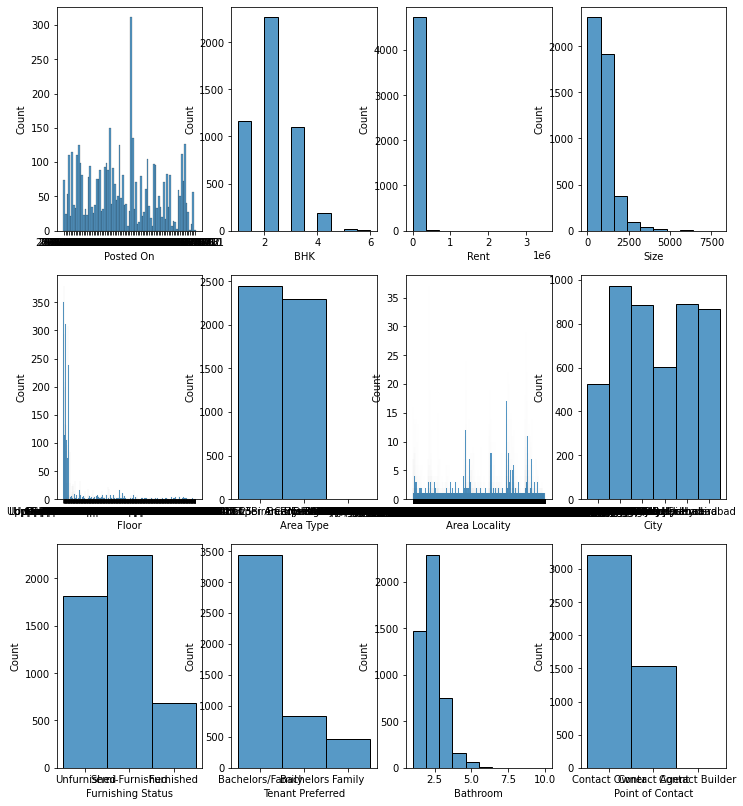

In [ ]:
plt.figure(figsize=(12,14))
for i,col in enumerate(df.columns):
  plt.subplot(3,4,i+1)
  sns.histplot(data=df,x=col,bins=10)
plt.show()

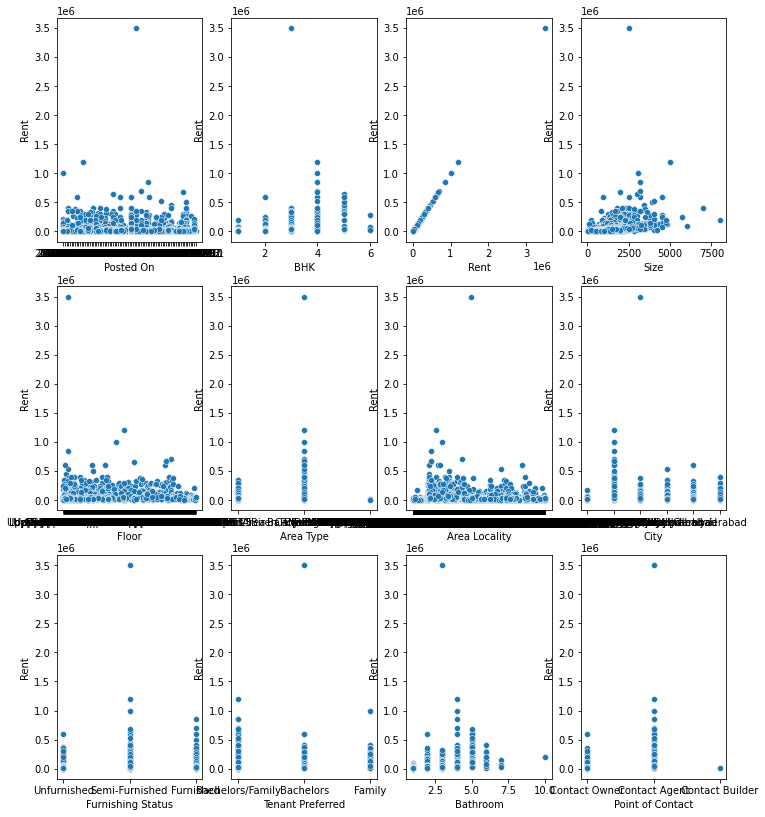

In [ ]:
# EDA
def plot_scatter(temp_df):
  plt.figure(figsize=(12,14))
  for i,col in enumerate(temp_df.columns):
    plt.subplot(3,4,i+1)
    sns.scatterplot(data=temp_df,x=col,y="Rent")
  plt.show()

plot_scatter(df)

In [ ]:
df_numeric = df[['Rent','Size']]

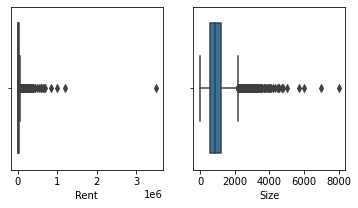

In [ ]:
def plot_box(temp_df):
  plt.figure(figsize=(6,3))
  for i,col in enumerate(temp_df.columns):
    plt.subplot(1,2,i+1)
    sns.boxplot(data=temp_df,x=col)
  plt.show()

plot_box(df_numeric)

In [ ]:
np.percentile(df['Rent'],[98,99,99.9,100])

array([ 211000.,  300000.,  685100., 3500000.])

In [ ]:
df_mod = df[df['Rent']<np.percentile(df['Rent'],99.9)]
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4741 non-null   object
 1   BHK                4741 non-null   int64 
 2   Rent               4741 non-null   int64 
 3   Size               4741 non-null   int64 
 4   Floor              4741 non-null   object
 5   Area Type          4741 non-null   object
 6   Area Locality      4741 non-null   object
 7   City               4741 non-null   object
 8   Furnishing Status  4741 non-null   object
 9   Tenant Preferred   4741 non-null   object
 10  Bathroom           4741 non-null   int64 
 11  Point of Contact   4741 non-null   object
dtypes: int64(4), object(8)
memory usage: 481.5+ KB


In [ ]:
df_numeric = df_mod[['Rent','Size']]

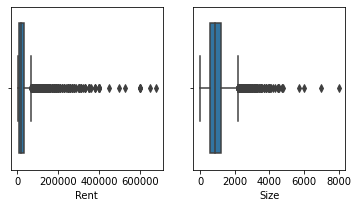

In [ ]:
plot_box(df_numeric)

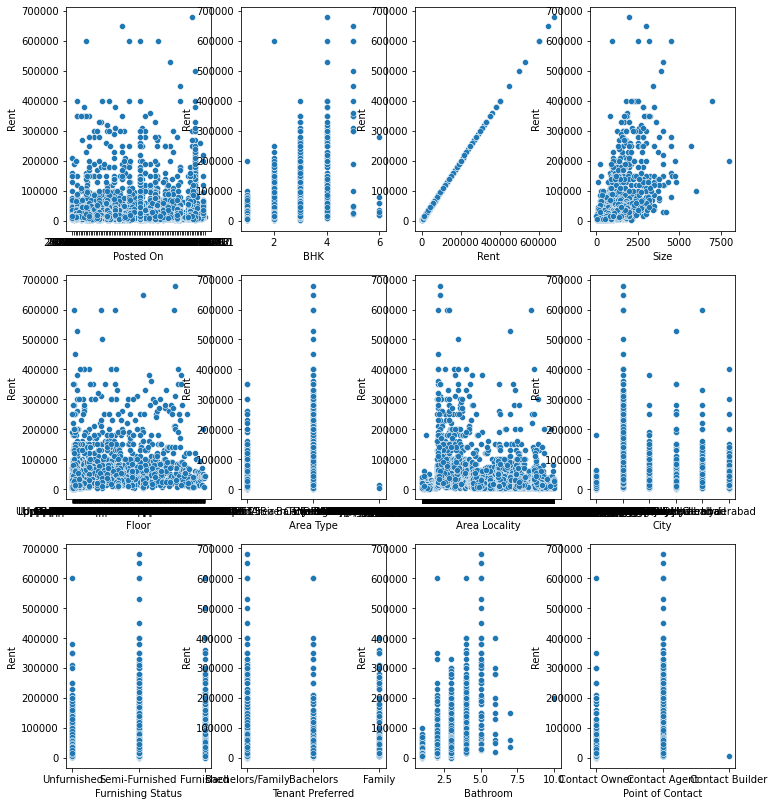

In [ ]:
plot_scatter(df_mod)

In [ ]:
df_mod = df_mod[df_mod['Rent']<500000]
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4733 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4733 non-null   object
 1   BHK                4733 non-null   int64 
 2   Rent               4733 non-null   int64 
 3   Size               4733 non-null   int64 
 4   Floor              4733 non-null   object
 5   Area Type          4733 non-null   object
 6   Area Locality      4733 non-null   object
 7   City               4733 non-null   object
 8   Furnishing Status  4733 non-null   object
 9   Tenant Preferred   4733 non-null   object
 10  Bathroom           4733 non-null   int64 
 11  Point of Contact   4733 non-null   object
dtypes: int64(4), object(8)
memory usage: 480.7+ KB


In [ ]:
df_numeric = df_mod[['Rent','Size']]

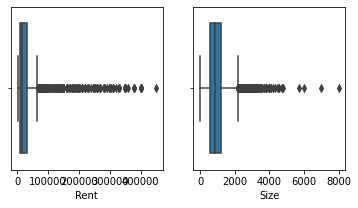

In [ ]:
plot_box(df_numeric)

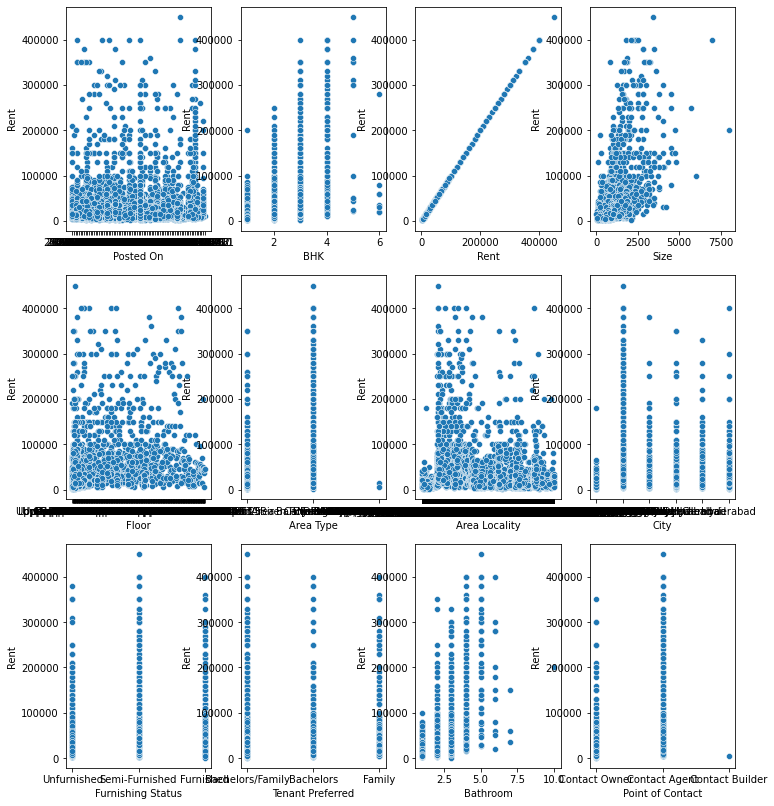

In [ ]:
plot_scatter(df_mod)

In [ ]:
df_mod = df_mod[df_mod['Rent']<400000]
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4725 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4725 non-null   object
 1   BHK                4725 non-null   int64 
 2   Rent               4725 non-null   int64 
 3   Size               4725 non-null   int64 
 4   Floor              4725 non-null   object
 5   Area Type          4725 non-null   object
 6   Area Locality      4725 non-null   object
 7   City               4725 non-null   object
 8   Furnishing Status  4725 non-null   object
 9   Tenant Preferred   4725 non-null   object
 10  Bathroom           4725 non-null   int64 
 11  Point of Contact   4725 non-null   object
dtypes: int64(4), object(8)
memory usage: 479.9+ KB


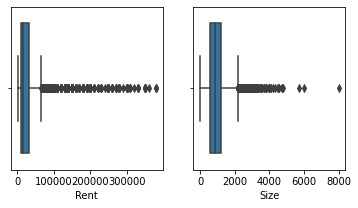

In [ ]:
df_numeric = df_mod[['Rent','Size']]
plot_box(df_numeric)

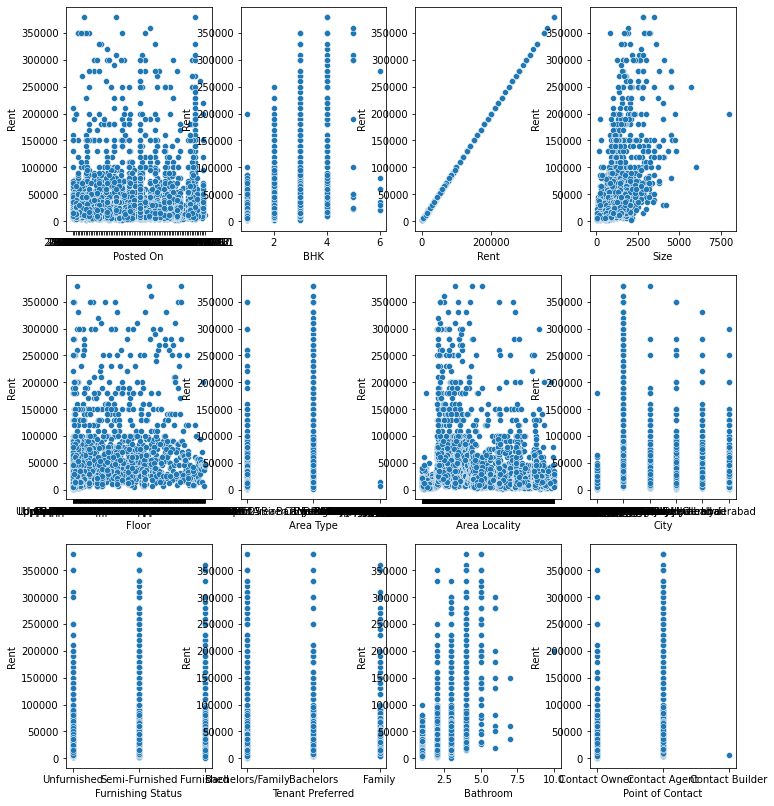

In [ ]:
plot_scatter(df_mod)

In [ ]:
X = df_mod.drop(columns=['Rent','Posted On'])
y = df_mod['Rent']
X.shape, y.shape

((4725, 10), (4725,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3780, 10), (945, 10), (3780,), (945,))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780 entries, 766 to 866
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                3780 non-null   int64 
 1   Size               3780 non-null   int64 
 2   Floor              3780 non-null   object
 3   Area Type          3780 non-null   object
 4   Area Locality      3780 non-null   object
 5   City               3780 non-null   object
 6   Furnishing Status  3780 non-null   object
 7   Tenant Preferred   3780 non-null   object
 8   Bathroom           3780 non-null   int64 
 9   Point of Contact   3780 non-null   object
dtypes: int64(3), object(7)
memory usage: 324.8+ KB


In [5]:
import pickle

df = pickle.load(open('/content/sample_data/refined_df.pkl','rb'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 2 to 4739
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          628 non-null    object
 1   BHK                628 non-null    int64 
 2   Rent               628 non-null    int64 
 3   Size               628 non-null    int64 
 4   Floor              628 non-null    object
 5   Area Type          628 non-null    object
 6   Area Locality      628 non-null    object
 7   City               628 non-null    object
 8   Furnishing Status  628 non-null    object
 9   Tenant Preferred   628 non-null    object
 10  Bathroom           628 non-null    int64 
 11  Point of Contact   628 non-null    object
dtypes: int64(4), object(8)
memory usage: 63.8+ KB


In [8]:
X = df.drop(columns=['Posted On','Rent'])
y = df['Rent']

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 2 to 4739
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                628 non-null    int64 
 1   Size               628 non-null    int64 
 2   Floor              628 non-null    object
 3   Area Type          628 non-null    object
 4   Area Locality      628 non-null    object
 5   City               628 non-null    object
 6   Furnishing Status  628 non-null    object
 7   Tenant Preferred   628 non-null    object
 8   Bathroom           628 non-null    int64 
 9   Point of Contact   628 non-null    object
dtypes: int64(3), object(7)
memory usage: 54.0+ KB


In [10]:
X_cat = X.drop(columns='Size')
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 2 to 4739
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                628 non-null    int64 
 1   Floor              628 non-null    object
 2   Area Type          628 non-null    object
 3   Area Locality      628 non-null    object
 4   City               628 non-null    object
 5   Furnishing Status  628 non-null    object
 6   Tenant Preferred   628 non-null    object
 7   Bathroom           628 non-null    int64 
 8   Point of Contact   628 non-null    object
dtypes: int64(2), object(7)
memory usage: 49.1+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_cat = X_cat.apply(le.fit_transform)
X_cat.head()

,BHK,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2,1,2,2,37,4,1,1,0,1
17,1,35,2,7,4,2,1,0,1
19,1,1,2,7,4,2,1,0,1
42,0,12,2,7,4,2,1,0,1
46,1,15,1,7,4,1,0,0,1


In [12]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(handle_unknown='ignore')
ohc.fit(X_cat)
X_cat_ohc = ohc.transform(X_cat).toarray()
X_cat_ohc[:1]

array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        1.]])

In [15]:
# Standardize the numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = X['Size']
scaler.fit(np.array(X_num).reshape(-1,1))
X_num_std = scaler.transform(np.array(X_num).reshape(-1,1))
X_num_std[:1]

array([[0.15159745]])

In [16]:
df_cat = pd.DataFrame(X_cat_ohc)
df_num = pd.DataFrame(X_num_std)

final_df = pd.concat([df_cat,df_num],axis=1,ignore_index=True)
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.151597
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.234591
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.504923
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.620780
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.006968


In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(final_df,y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((502, 114), (126, 114), (502,), (126,))

In [18]:
X_tr,X_cv,y_tr,y_cv = train_test_split(X_train,y_train,test_size=0.20,random_state=42)
X_tr.shape, X_cv.shape, y_tr.shape, y_cv.shape

((401, 114), (101, 114), (401,), (101,))

In [21]:
# SVR

from sklearn.svm import SVR

reg = SVR(C=1.0)
reg.fit(X_tr,y_tr)
print(reg.score(X_tr,y_tr))

-0.06357899739090733
